## Linear Regression Theory

### Supervised Learning

Linear regression is a **supervised learning algorithm**. In supervised learning, the algorithm is trained on a dataset that includes both input features and corresponding output labels or target values.

More specifically, supervised learning involves observing several examples of a random feature vector $\mathbf{x}$ along with an associated target value or vector $\mathbf{y}$, and learning a mapping from $\mathbf{x}$ to $\mathbf{y}$. The goal is to enable the model to predict the target $\mathbf{y}$ for new, unseen instances of $\mathbf{x}$.

The term *supervised* arises from the idea that the correct output $\mathbf{y}$ is provided by an instructor or a "teacher", guiding the learning process. This guidance helps the machine learning model understand what output it should produce for a given input.

### Linear Regression Model

Linear regression is used to solve a **regression problem**. The goal is to build a system that can take a feature vector $\mathbf{x} \in \mathbb{R}^n$ as input (independent variables) and predict a scalar value $y \in \mathbb{R}$ as output (dependent variable). The output $y$ is **continuous**. 

Linear regression flows from a few simple assumptions. First, we assume that the relationship between features $\mathbf{x}$ and target $y$ is approximately linear — specifically, that the **conditional mean** $E[Y|X=\mathbf{x}]$ can be expressed as a weighted sum of the input features. This allows for the fact that individual target values may deviate from this expected value due to **observation noise**. We further assume that this noise is well-behaved and follows a Gaussian distribution. 

We use $m$ to denote the number of examples in our dataset. Superscripts index samples, while subscripts refer to individual feature dimensions. That is, $\mathbf{x}^{(i)}$ denotes the $i$-th sample and $x^{(i)}_{j}$ denotes its $j$-th feature.

Under these assumptions, the model describes how the features can be transformed into an estimate of the target value. The linearity assumption means that the expected value of the output can be modeled as:

$$
h(x) = \theta_0 + \sum_{j=1}^{n} \theta_i x_j
$$

Here:
- $h(x)$ is the predicted output (also referred to as the **hypothesis**),
- $\theta_0$ is the **intercept** term (also called the **bias**),
- $\theta_j$ are the **coefficients** or **weights**, and
- $x_j$ are the input features.

If there is only **one feature**, the model is called **simple linear regression**. If there are **multiple features**, it is referred to as **multiple linear regression**.

The parameters $\theta_j$ control how the input features affect the output prediction. Each coefficient $\theta_j$ determines the weight or contribution of the corresponding feature $x_j$. The term $\theta_0$ (bias) allows the model to make predictions that do not necessarily pass through the origin.

This **bias parameter** is called so because it represents the model’s prediction in the absence of any input, i.e., when all features are zero. This notion of "bias" is different from **statistical bias**.

With this terminology, the function is often rewritten as:

$$
\hat{y} = \sum_{j=1}^{n} w_j x_j + b
$$

Or more compactly via the dot product between vector $\mathbf{w}$ and vector $\mathbf{x}$:

$$
\hat{y} = \mathbf{w}^T \mathbf{x} + b
$$

Technically, because of the bias term $b$, this is known as an **affine function**, not a purely linear function. However, in machine learning, the term **linear function** is commonly used to describe it.

### Loss and Cost Functions

To successfully predict the target value $y$ from input $\mathbf{x}$, we need to choose the parameters such that the predicted value $\hat{y}$ closely matches $y$.

To do this, we first need a way to **measure the fitness** of the model. In linear regression, a common way to measure how the model is fitted to the data is by using the **mean squared error (MSE)** as a **cost function**:

$$
J(\mathbf{w}, b) = \frac{1}{m} \cdot \frac{1}{2} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2
$$

This cost function measures the average squared difference between predicted values $\hat{y}^{(i)}$ and actual target values $y^{(i)}$ over the dataset.

Intuitively:
- The error becomes **zero** when $\hat{y} = y$.
- The error **increases exponentially** as the Euclidean distance between $\hat{y}$ and $y$ increases.
- Larger differences between predicted and actual values result in **even larger contributions to the total error** due to the squared term.

This quadratic nature encourages the model to avoid large errors, although it can also lead to **excessive sensitivity to outliers or anomalous data**.

> 💡 **Note:** The terms *cost function* and *loss function* are often used interchangeably, but they have different scopes:
> - A **loss function** measures the error for a **single training example**.
> - A **cost function** is typically the **average of the loss function** over the entire training set.

The corresponding **loss function** (also known as the **squared error loss**) is defined as:

$$
L(\mathbf{w}, b) = \frac{1}{2} \left( \hat{y}^{(i)} - y^{(i)} \right)^2
$$

The factor $\frac{1}{2}$ is included for **mathematical convenience** — it simplifies the derivative during optimization but does not affect the outcome of training.

Since the loss function quantifies the performance of the model, it is intuitive to **minimize** it to achieve better predictions. Therefore, the training process aims to find the parameters $w$ and $b$ that **minimize the loss**:

$$
\arg\min_{\mathbf{w}, b} L(\mathbf{w}, b)
$$

For this optimization to be feasible, the loss function must be **differentiable**, allowing us to use gradient-based optimization methods.

#### Why squared error?

Linear regression also has a probabilistic interpretation that naturally motivates the use of the squared error as a loss function.

As previously discussed, linear regression flows from a few assumptions:

$$
y = \mathbf{w}^T \mathbf{x} + b + \varepsilon
$$

Here, $\varepsilon$ is an error term that accounts for unmodeled effects and random noise. It is assumed to follow a Gaussian distribution:

$$
\varepsilon \sim \mathcal{N}(0, \sigma^2)
$$

Because $\varepsilon$ is additive, zero-mean, and Gaussian, this implies that the conditional distribution of $y$ given $\mathbf{x}$ is also Gaussian with a mean that is shifted from 0 to $\mathbf{w}^T x + b$:

$$
P(y \mid \mathbf{x}; \mathbf{w}, b) = \mathcal{N}(y \mid \mathbf{w}^T \mathbf{x} + b, \sigma^2)
$$

Since we assume that the datapoints are independent and identically distributed (i.i.d.), the joint probability of the data is a product of the individual probabilities. It also can be described as the **likelihood** of the parameters $\mathbf{w}$ and $b$:

$$
\mathcal{L}(\mathbf{w}, b) = P(\mathbf{y} \mid \mathbf{X}; \mathbf{w}, b) = \prod_{i=1}^m \mathcal{N}(y^{(i)} \mid \mathbf{w}^T \mathbf{x}^{(i)} + b, \sigma^2)
$$

A well-established method for parameter estimation in statistics is **Maximum Likelihood Estimation (MLE)**. In MLE, we select the parameters $\mathbf{w}$ and $b$ that maximize the likelihood function:

$$
\arg\max_{\mathbf{w}, b} \prod_{i=1}^m\frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(y^{(i)} - \mathbf{w}^T \mathbf{x}^{(i)} - b)^2}{2\sigma^2} \right)
$$

Since working with the product of many probabilities can be numerically unstable and mathematically unwieldy, we usually take the logarithm of the likelihood function. This does not affect its arg max (because the logarithm is a monotonic function), and conveniently transforms the product into a sum:

$$
\log \mathcal{L}(\mathbf{w}, b) = \sum_{i=1}^m \log \left( \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(y^{(i)} - \mathbf{w}^T \mathbf{x}^{(i)} - b)^2}{2\sigma^2} \right) \right)
$$

Simplifying this, we get:

$$
\log \mathcal{L}(\mathbf{w}, b) = -\frac{m}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^m (y^{(i)} - \mathbf{w}^T \mathbf{x}^{(i)} - b)^2
$$

The first term is a constant with respect to the parameters, and $\sigma^2$ in the second term is also constant during optimization. The remaining term is identical to our squared error loss function. It follows that maximizing the log-likelihood of a linear model under the assumption of additive Guassian noise is equivalent to minimizing the **mean squared error**. To follow the standard convention of minimizing a loss function in machine learning, we often minimize the **negative log-likelihood**, which is mathematically equivalent to maximizing the log-likelihood. Note the changing of the sign:

$$
\arg\min_{\mathbf{w}, b} \frac{1}{2} (y^{(i)} - \hat{y}^{(i)})^2
$$

> **Note:** Do not get confused by the different order of $y$ and $\hat{y}$. The function $(y - \hat{y})^2$ is equal to $(\hat{y} - y)^2$ because the result of squaring is always positive. This means the loss is unchanged. The gradient expression will look different depending on the order, but once simplified, it yields the same result.

We will explore MLE in more depth in a future notebook.

### Gradient Descent

One effective method for finding the optimal parameters in linear regression is the **gradient descent algorithm**. Gradient descent is a **first-order optimization algorithm** and is widely used in many machine learning models.

#### What Is the Gradient?

The **gradient** is a generalization of the derivative for functions that depend on **one** or **multiple variables**. To compute the gradient of the loss function with respect to the parameters, we calculate the **partial derivatives** of the function with respect to each parameter — varying one variable at a time while keeping the others constant.

The gradient is a **vector** composed of these partial derivatives:

$$ 
\nabla L(w, b) = \left[ \frac{\partial L}{\partial w_1}, \frac{\partial L}{\partial w_2}, \dots, \frac{\partial L}{\partial w_n}, \frac{\partial L}{\partial b} \right]^T
$$

This gradient vector points in the direction of the **steepest ascent** of the loss function. However, since our goal is to **minimize** the loss, we move in the direction **opposite** to the gradient.

#### Gradient Descent Algorithm

To minimize the loss function using gradient descent:
1. Start with random initial values for the parameters $\mathbf{w}$ and $b$ (commonly initialized as zeros or sampled from a Gaussian distribution).
2. Iteratively update the parameters by taking small steps in the opposite direction of the gradient:

#### Intuition

You can imagine the loss function as a surface in high-dimensional space. The optimization process is like a ball placed somewhere on this surface (representing the current parameter values). When released, the ball **rolls downhill** following the path of **steepest descent** until it reaches a **minimum**.

#### Batch Gradient Descent

A recurring challenge in machine learning is the trade-off between training efficiency and generalization. Large training sets are often essential for good generalization performance. However, computing the gradient on such large datasets can be extremely time-consuming.

As previously discussed, the cost function can be decomposed as a **sum over individual loss functions** for each training example. Standard gradient descent performs optimization using the **entire training set**:

$$
g = \frac{1}{m} \sum_{i=1}^{m} \nabla L(\mathbf{w}, b)
$$

This means we must iterate over the entire dataset before updating the parameters — even if that update could have a large impact. The situation becomes worse when the training data contains redundancy. The benefit of a full update is limited.

#### Stochastic Gradient Descent (SGD)

To overcome this inefficiency, we can use **stochastic gradient descent (SGD)**. The key insight behind SGD is recognizing that the gradient of the cost function is an **expectation**, and expectations can be estimated using only a **subset** of the data.

In its most extreme form, SGD performs updates based on a **single training example at a time**. While this introduces noise, it still provides a usable approximation of the full gradient. In fact, this noisy update can act as a form of **regularization**, helping to avoid overfitting.

However, updating based on a single example has its drawbacks:
- It can be computationally inefficient. Processors handle **matrix–vector operations** far more efficiently than repeated **vector–vector operations**.
- Excessive noise in the gradient estimates can hinder convergence stability.

#### Mini-Batch SGD

The practical solution to these problems is **mini-batch stochastic gradient descent**. Instead of using the full dataset or just one sample, we use a **mini-batch** of samples:

- Let $B = \{\mathbf{x}^{(1)}, \mathbf{x}^{(2)}, \dots, \mathbf{x}^{(m')}\}$ be a mini-batch drawn uniformly from the training set.
- $m'$ is the **mini-batch size**, typically fixed as the training set grows.
- Good values for $m'$ are often in the range **32 to 256**, preferably a multiple of a large power of 2.

The mini-batch estimate of the gradient is:

$$
g = \frac{1}{m'} \sum_{i=1}^{m'} \nabla L(\mathbf{w}, b)
$$

#### Computing the Gradient for Squared Error Loss

Given the loss function:

$$
L(\mathbf{w}, b) = \frac{1}{2}(\mathbf{w}^T  \mathbf{x}^{(i)} + b - y^{(i)})^2
$$

The gradients are computed using the **chain rule**:

- Gradient with respect to $w$:

$$
\nabla_{\mathbf{w}} L = (\mathbf{w}^T  \mathbf{x}^{(i)} + b - y^{(i)}) \mathbf{x}^{(i)}
$$

- Gradient with respect to $b$:

$$
\nabla_b L = (\mathbf{w}^T  \mathbf{x}^{(i)} + b - y^{(i)})
$$

- The average gradients over the mini-batch:

$$
g_{\mathbf{w}} = \frac{1}{m'} \sum_{i=1}^{m'} (\mathbf{w}^T  \mathbf{x}^{(i)} + b - y^{(i)}) \mathbf{x}^{(i)}
$$

$$
g_b = \frac{1}{m'} \sum_{i=1}^{m'} (\mathbf{w}^T  \mathbf{x}^{(i)} + b - y^{(i)})
$$

#### Parameter Update Rule

To update the model parameters, we multiply the gradients by a small positive scalar $\eta$, called the **learning rate**, and subtract the result from the current values:

$$
\mathbf{w} := \mathbf{w} - \eta g_{\mathbf{w}}, \quad b := b - \eta g_b
$$

### Training Procedure and Evaluation

Training a linear regression model typically involves multiple **epochs**.

- An **epoch** refers to a full pass over the entire training dataset.
- The dataset is divided into **mini-batches**, and each mini-batch is used to compute gradients and update the model parameters.
- To monitor cost of the model, we compute the **average loss per epoch**, which requires normalizing the accumulated mini-batch losses by the number of mini-batches.

After training for a **predetermined number of epochs**, or until a **stopping criterion** (like convergence or early stopping) is met, we record the learned parameters of the model.

#### Making Predictions

Once the model is trained, it can be used to make predictions on **new, unseen data**. However, to evaluate how well the model generalizes beyond the data it was trained on, we need to test it on a **separate dataset**.

#### Dataset Splitting

To accurately evaluate the model’s quality, the dataset is typically split into:

- **Training set**: Used to train the model and find optimal parameters.
- **Test set**: Held back during training. It is only used after training to evaluate the model’s generalization performance.

In practice, it is also common to introduce a third dataset:

- **Validation set**: A portion of the training data that is set aside and not used directly for updating model parameters.
  - The validation set is used **between epochs** to monitor the model's performance and make decisions such as adjusting hyperparameters or implementing early stopping.

This is especially useful when training is time-consuming, as it allows for **on-the-fly adjustments** to improve model performance and efficiency.

#### Evaluation Metrics

As already mentioned, after training a machine learning model, it is important to evaluate its performance to understand how well it generalizes to unseen data. For regression tasks, there are several standard metrics used to assess the accuracy and reliability of the model’s predictions. These metrics compare the predicted values $\hat{y}$ to the true target values $y$ and quantify the prediction error in different ways.

One commonly used metric is the **Mean Absolute Error (MAE)**. It measures the average magnitude of the errors in a set of predictions, without considering their direction. The MAE is defined as:

$$
\text{MAE} = \frac{1}{m} \sum_{i=1}^{m} \left| \hat{y}^{(i)} - y^{(i)} \right|
$$

This metric is easy to interpret and gives equal weight to all errors, making it robust to outliers compared to squared-error-based metrics.

Another widely used metric is the **Mean Squared Error (MSE)**. It is defined as:

$$
\text{MSE} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2
$$

The MSE penalizes larger errors more heavily due to the squaring operation. This makes it sensitive to outliers and particularly useful when large errors are especially undesirable.

To make the error more interpretable in terms of the original units of the target variable, the **Root Mean Squared Error (RMSE)** is often used. It is simply the square root of the MSE:

$$
\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{ \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2 }
$$

The RMSE provides a measure of the typical size of the prediction errors and is more intuitive to interpret in practice.

Finally, the **Coefficient of Determination**, commonly referred to as **$R^2$ score**, measures how well the predicted values explain the variability of the target values. It is defined as:

$$
R^2 = 1 - \frac{\sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2}{\sum_{i=1}^{m} \left( y^{(i)} - \bar{y} \right)^2}
$$

Here, $\bar{y}$ denotes the mean of the true target values. The $R^2$ score ranges from $-\infty$ to $1$, where a score of $1$ indicates perfect predictions and a score of $0$ indicates that the model performs no better than simply predicting the mean of the target values. Negative values indicate that the model performs worse than this naive baseline.

Together, these metrics offer complementary views on model performance, and it is common practice to report multiple metrics to get a more complete picture of how well a regression model is performing.



## Linear regression implementation from scratch


Required imports:

In [170]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

For our implementation, we use the **California Housing dataset**, a well-known benchmark dataset commonly used for regression problems. It is particularly well-suited for training and evaluating **multiple linear regression** models, as it includes a variety of continuous input features related to housing data.

We can load the dataset directly using `scikit-learn`'s built-in utility function. To learn more about the dataset's structure, feature descriptions, and usage context, you can print the .DESCR attribute, which contains a detailed description of the dataset.

In [171]:
housing_sklearn = fetch_california_housing(as_frame=True)
print(housing_sklearn.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

We load the dataset into a **pandas DataFrame** to take advantage of pandas' powerful data manipulation and exploration capabilities.

In [172]:
housing: pd.DataFrame= housing_sklearn.frame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Since all features in the dataset are numerical, there is no need for data type conversion. Additionally, we verify that there are no missing values in the dataset.

In [173]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [174]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


To get an overview of how the different features relate to each other—and especially how they correlate with the target variable—we can visualize the feature correlation matrix using a heatmap.

Text(0.5, 1.0, 'California Housing')

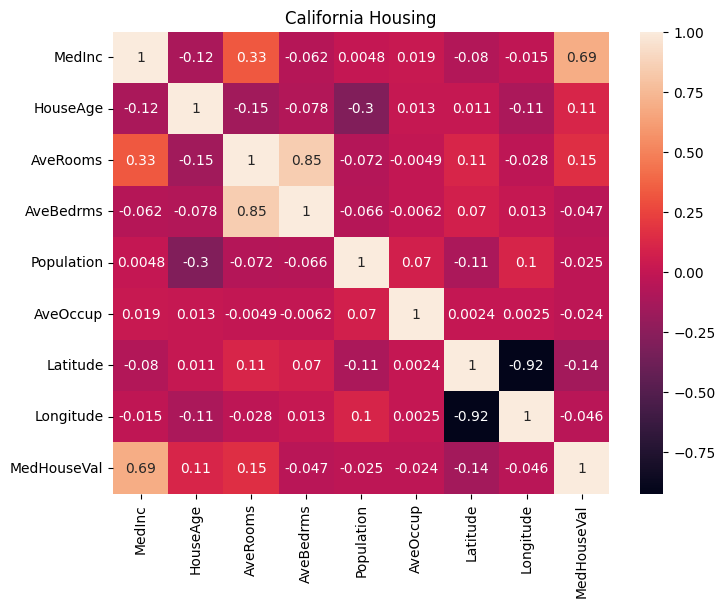

In [175]:
plt.figure(figsize=(8, 6))
sns.heatmap(housing.corr(), annot=True).set_title('California Housing')

Next, we split the dataset into **features** and **target**. The target variable, `MedHouseVal`, represents the median house value, while the remaining columns are used as features.

In [176]:
X: pd.DataFrame = housing.drop("MedHouseVal", axis=1)
y: pd.Series = housing["MedHouseVal"]

In [177]:
X: np.ndarray = X.to_numpy()
y: np.ndarray = y.to_numpy()

Alternatively, we could have loaded the data directly as NumPy arrays from the beginning using the `return_X_y=True` parameter.

In [178]:
X, y = fetch_california_housing(return_X_y=True)

Before creating and training our model, we define several hyperparameters that control the process. We can also set a random seed for reproducibility.

In [179]:
# np.random.seed(42)

epochs = 100
batch_size = 32
eta = 0.1
val_split = 0.1
split_ratio = 0.75
feature_dim = X.shape[1]

Shuffling the dataset before splitting it into training, validation, and test sets is an important preprocessing step. This prevents any potential ordering bias — for instance, if the dataset was sorted by the target variable. While the California housing dataset is not ordered in that way, shuffling still helps ensure that all subsets of the data are more representative of the overall distribution. This, in turn, helps the model generalize better to unseen examples.

The following function implements this shuffling using NumPy's `permutation` function. By applying this function, the dataset is randomly shuffled, maintaining the correspondence between input features `X` and target values `y`.

In [180]:
def shuffle_data(X: np.ndarray, y: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    shuffle_indices = np.random.permutation(len(X))
    X, y = X[shuffle_indices], y[shuffle_indices]

    return X, y

In [181]:
X, y = shuffle_data(X, y)

After shuffling, the next step is to split the dataset into **training** and **test** sets.

We define a function that performs this split based on a specified ratio (e.g., 75% training and 25% test), maintaining alignment between features and targets in both sets.

In [182]:
def split_dataset(X: np.ndarray, y: np.ndarray, split_ratio: float) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    split_size = int(len(X) * split_ratio)
    X_train = X[:split_size]
    y_train = y[:split_size]
    X_test = X[split_size:]
    y_test = y[split_size:]

    return X_train, y_train, X_test, y_test

In [183]:
X_train, y_train, X_test, y_test = split_dataset(X, y, split_ratio)

Before training a model, it's important to normalize the features to ensure they are on a similar scale. This helps gradient-based optimization algorithms converge more efficiently and prevents features with larger magnitudes from dominating the learning process.

One common normalization technique is **min-max scaling**, which rescales each feature to a fixed range — typically [0, 1].The transformation is defined by the following formula:

$$
x_{\text{scaled}} = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
$$

Where:
- $x$ is the original value,
- $x_{\min}$ and $x_{\max}$ are the minimum and maximum values of the feature in the training set.
- $x_{\text{scaled}}$ is the normalized value

> ⚠️ **Important:** We must compute $x_{\min}$ and $x_{\max}$ **only from the training set**, and then apply these values to normalize both the training and test sets.  
> This prevents **data leakage**, which occurs when information about the test set distribution influences the model during training. Using test set statistics would give the model unfair foresight and could lead to overly optimistic performance evaluations.

In [184]:
class MinMaxScaler:
    def fit_transform(self, data: np.ndarray) -> np.ndarray:
        self.min_data = min(data)
        self.max_data = max(data)
        
        return (data - self.min_data) / (self.max_data - self.min_data)
    
    def fit(self, data: np.ndarray) -> np.ndarray:
        return (data - self.min_data) / (self.max_data - self.min_data)

In [185]:
def min_max_normalize(X_train: np.ndarray, X_test: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    X_train_transpose = X_train.transpose()
    X_test_transpose = X_test.transpose()
    
    for i in range(len(X_train_transpose)):
        scaler = MinMaxScaler()
        X_train_transpose[i, :] = scaler.fit_transform(X_train_transpose[i, :])
        X_test_transpose[i, :] = scaler.fit(X_test_transpose[i, :])
        
    return X_train_transpose.transpose(), X_test_transpose.transpose()

In [186]:
X_train, X_test = min_max_normalize(X_train, X_test)

We define an abstract `Loss` class to represent general loss functions. It includes a `mean_loss` method, which computes the mean value of the loss across all samples.

In [187]:
class Loss:
    def mean_loss(self, y_true: np.ndarray, y_pred: np.ndarray) -> float:
        losses: np.ndarray = self(y_true, y_pred)
        mean_loss = np.sum(losses) / len(losses)

        return mean_loss

The MSE class inherits from Loss and implements the squared loss and its gradient. Here, we return the element-wise loss for each prediction. This allows us to later compute the mean, sum, or other reductions if needed.

In [188]:
class MSE(Loss):   
    def __call__(self, y_true: np.ndarray, y_pred: np.ndarray) -> np.ndarray:       
        losses = (y_pred - y_true)**2 / 2
        return losses
    
    def gradient(self, y_true: np.ndarray, y_pred: np.ndarray, X: np.ndarray) -> tuple[np.ndarray, float]:      
        grad_w = ((y_pred - y_true).dot(X)) / len(X)
        grad_b = np.sum((y_pred - y_true)) / len(X)
        return grad_w, grad_b

We now define a modular implementation of linear regression using NumPy. The implementation is split across two classes: `LinRModule` and `LinRModel`.

The `LinRModule` class defines the core functionality shared by linear regression models, including:

- Training the model via `fit`
- Making predictions with `predict`
- Evaluating performance with `evaluate`

The constructor initializes the model with a mean squared error loss function.

If a validation split is specified, the data is split into validation and training sets. The first `val_split` fraction of the data is used for validation. The rest is divided into batches. This enables mini-batch gradient descent. If a validation set was used, the validation loss is computed and logged alongside the training loss at each epoch.

In [189]:
class LinRModule:
    def __init__(self):
        self.loss = MSE()
    
    def fit(self, X: np.ndarray, y: np.ndarray, epochs: int, batch_size: int = 32, eta: float = 0.01, val_split: float = None) -> tuple[list[float], list[float]]:
        if val_split:
                split_size = int(len(X) * val_split)
                X_val = X[:split_size]
                y_val = y[:split_size]
                X = X[split_size:]
                y = y[split_size:]
    
        batches = [(X[i : i + batch_size], y[i : i + batch_size]) for i in range(0, len(X), batch_size)]
        
        losses = []
        val_losses = []
        for i in range(epochs):
            loss = 0
            for X_batch, y_true in batches:
                y_pred = self(X_batch)
                loss += self.loss.mean_loss(y_true, y_pred)
                grad_w, grad_b = self.loss.gradient(y_true, y_pred, X_batch)
                self.w -= eta * grad_w
                self.b -= eta * grad_b

            if val_split:
                y_pred_val = self(X_val)
                val_loss = self.loss.mean_loss(y_val, y_pred_val)
                print(f"Epoch {i}: Loss {loss/len(batches)}, Val-Loss {val_loss}")
                val_losses.append(val_loss)
            else:
                print(f"Epoch {i}: Loss {loss/len(batches)}")
                
            losses.append(loss/len(batches))

        return losses, val_losses

    def predict(self, X: np.ndarray) -> np.ndarray:
        y_pred = self(X)
        
        return y_pred

    
    def evaluate(self, y_pred: np.ndarray, y_true: np.ndarray) -> tuple[float, float, float, float]:
        mae = np.sum(np.abs(y_true - y_pred)) / len(y_true)
        mse = np.sum((y_true - y_pred)**2) / len(y_true)
        rmse = np.sqrt(np.sum((y_true - y_pred)**2) / len(y_true))
        r2 = 1 - (np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))
        
        return mae, mse, rmse, r2

The `LinRModel` class inherits from `LinRModule` and adds the model-specific components: parameter initialization and the forward computation. Weights and bias are initialized using random values drawn from a normal distribution.

In [190]:
class LinRModel(LinRModule):
    def __init__(self, feature_dim: int):
        super().__init__()
        self.w: np.ndarray = np.random.normal(size=(feature_dim))
        self.b: np.ndarray = np.random.normal(size=1)
        
    def __call__(self, X: np.ndarray) -> np.ndarray:
        y_pred = np.dot(X, self.w) + self.b
               
        return y_pred

We now instantiate our linear regression model using the number of input features and begin training it with the training data and the defined hyperparameters. The fit method returns two lists: history containing the training loss for each epoch, and val_history containing the validation loss if a validation split was specified.

In [191]:
model = LinRModel(feature_dim)
history, val_history = model.fit(X_train, y_train, epochs, batch_size, eta, val_split)

Epoch 0: Loss 0.5065857143812499, Val-Loss 0.3814187543525532
Epoch 1: Loss 0.34806087609507647, Val-Loss 0.31969069783238224
Epoch 2: Loss 0.31102834861591494, Val-Loss 0.3031249645972602
Epoch 3: Loss 0.2994224760792555, Val-Loss 0.296755612845501
Epoch 4: Loss 0.2941046534648583, Val-Loss 0.2928636288629628
Epoch 5: Loss 0.29063189907570924, Val-Loss 0.2897814196234983
Epoch 6: Loss 0.28792615558264373, Val-Loss 0.287146835535361
Epoch 7: Loss 0.2856865851275769, Val-Loss 0.28486369526293703
Epoch 8: Loss 0.2837980362940273, Val-Loss 0.2828847844176933
Epoch 9: Loss 0.28219503195026263, Val-Loss 0.2811714382765663
Epoch 10: Loss 0.2808297138189217, Val-Loss 0.27968818994669276
Epoch 11: Loss 0.27966358263089397, Val-Loss 0.2784029943559724
Epoch 12: Loss 0.27866477473190593, Val-Loss 0.27728763055571415
Epoch 13: Loss 0.27780671611217045, Val-Loss 0.27631767740895297
Epoch 14: Loss 0.27706719890412984, Val-Loss 0.27547221521742343
Epoch 15: Loss 0.27642765096553157, Val-Loss 0.27473

To better understand how the model is learning, we can visualize the loss curves across epochs using Seaborn’s relplot. This can help us monitor convergence and detect underfitting or overfitting.

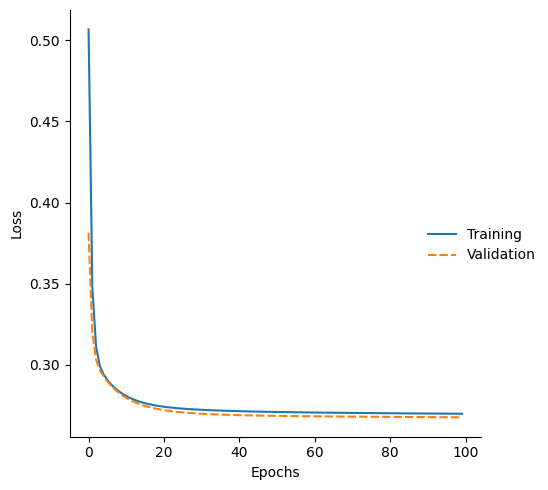

In [192]:
plot: sns.FacetGrid = sns.relplot(data=(history, val_history), kind="line")
plt.xlabel("Epochs")
plt.ylabel("Loss")
new_labels: list[str] = ['Training', 'Validation']
for texts, labels in zip(plot._legend.texts, new_labels):
    texts.set_text(labels)

After training the model and validating its performance during training, we now evaluate how well it performs on the unseen test data. The predict method generates predictions for the test set, and the evaluate method computes the four decribed evaluation metrics. This output gives a comprehensive overview of how accurately the model is able to generalize to new data.

In [193]:
y_pred = model.predict(X_test)
mae, mse, rmse, r2 = model.evaluate(y_pred, y_test)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 0.546743294627733
MSE: 0.5348709997620067
RMSE: 0.7313487538527749
R2: 0.5953488825501091


## Conclusion

This notebook demonstrated a fundamental implementation of linear regression from scratch, applied to a widely used benchmark dataset — the California housing dataset. It also provided a detailed explanation of the theory behind linear regression, helping to connect the mathematical foundations with practical implementation.

While the model presented here works well for demonstration purposes, it can be adapted to other datasets as well. However, when doing so, it is important to perform proper exploratory data analysis (EDA) and feature engineering to ensure the model receives meaningful and well-structured input.

Finally, this implementation provides a solid foundation that can be extended further. Techniques such as regularization (e.g., L1/L2 penalties), early stopping, or adaptive learning rates could improve generalization and training efficiency, especially when working with more complex or noisy datasets.

## References

Deisenroth, M. P., Faisal, A. A., & Ong, C. S. (2020). *Mathematics for machine learning*. Cambridge University Press. Retrieved from https://mml-book.github.io/

Goodfellow, I., Bengio, Y., & Courville, A. (2016). *Deep Learning*. MIT Press. Retrieved from https://www.deeplearningbook.org/

Zhang, A., Lipton, Z. C., Li, M., & Smola, A. J. (2022). *Dive into Deep Learning*. Retrieved from https://d2l.ai/chapter_linear-regression/linear-regression.html

Ng, A. (n.d.). *Linear Regression with One Variable [Video]*. Deep Learning Specialization, Stanford University. Retrieved from https://www.youtube.com/watch?v=4b4MUYve_U8&list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU&index=3
